In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:red")
    
    if draw_path:
        path_cover=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 1 [(0,1)-weights]

In [3]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

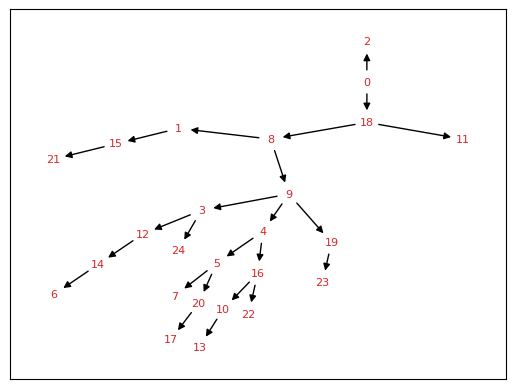

In [4]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

0: (11.12174046994793, 0, 18, 2)
2: (0, 0.7977562074230161, None, None)
18: (9.431516803694882, 0.892467458830033, 8, 11)
8: (9.2136087981177, 0.12603851472739536, 1, 9)
11: (0, 0.09186949084978413, None, None)
1: (1.7432810981749651, 0.8381008122574674, 15, None)
9: (6.632226887685268, -0.22552858561678446, 19, 3)
15: (0.8864538053441008, 0.8568272928308645, 21, None)
3: (2.033408282585799, 0.4908051027631126, 24, 12)
4: (3.0535582336576352, 0.11258568403417335, 5, 16)
19: (0.2067345124482346, 0.8477207562304858, 23, None)
21: (0, 0.8864538053441008, None, None)
12: (1.3272090876829628, 0.3243095919924279, 14, None)
24: (0, 0.3818896029104081, None, None)
5: (0.6438187145933159, 0.5839485221388294, 7, 20)
16: (1.6085078673466766, 0.21728312957881357, 22, 10)
23: (0, 0.2067345124482346, None, None)
14: (0.9769508317917671, 0.35025825589119564, 6, None)
7: (0, 0.5737376856525619, None, None)
20: (0.044350567376415406, 0.025730461564338558, 17, None)
10: (0.6643525896073521, 0.4600428895

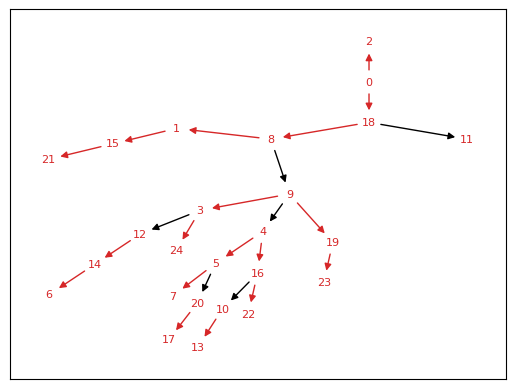

In [5]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [6]:
nx.get_edge_attributes(test_tree, 'weight')

{(0, 2): 0.7977562074230161,
 (0, 18): 0.9843369496798171,
 (1, 15): 0.8568272928308645,
 (1, 8): 0.8381008122574674,
 (3, 12): 0.3243095919924279,
 (3, 9): 0.8151146947555405,
 (3, 24): 0.3818896029104081,
 (4, 5): 0.609678983703168,
 (4, 16): 0.6773260190983791,
 (4, 9): 0.3298688136129869,
 (5, 7): 0.5737376856525619,
 (5, 20): 0.025730461564338558,
 (6, 14): 0.9769508317917671,
 (8, 18): 0.12603851472739536,
 (8, 9): 0.26527651714632816,
 (9, 19): 0.8477207562304858,
 (10, 13): 0.6643525896073521,
 (10, 16): 0.4600428895195655,
 (11, 18): 0.09186949084978413,
 (12, 14): 0.35025825589119564,
 (15, 21): 0.8864538053441008,
 (16, 22): 0.48411238821975877,
 (17, 20): 0.044350567376415406,
 (19, 23): 0.2067345124482346}

### Random tree with edge weights in [0,1)

In [15]:
n = 25
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

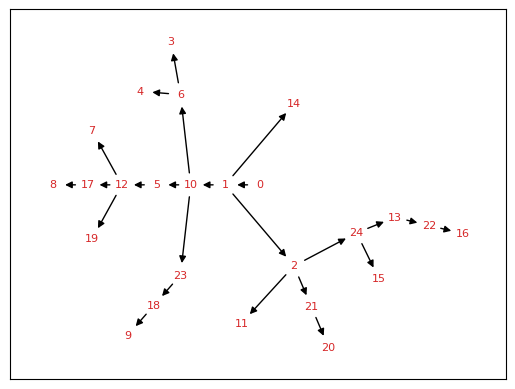

In [16]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (10.315785468703977, 0, 10, 13)
10: (0.02953092650613076, 0.836421076969268, 5, None)
3: (0.912616755016534, 0.013103367783688702, 9, None)
13: (0, 0.7262272981922117, None, None)
20: (7.810989412019832, 0.5047640682204901, 11, None)
5: (0, 0.02953092650613076, None, None)
9: (0.05457439371107675, 0.8580423613054573, 12, None)
11: (7.682907426651203, 0.1280819853686287, 14, None)
12: (0, 0.05457439371107675, None, None)
14: (6.763696756054786, 0.9192106705964167, 6, None)
6: (6.67396630670412, 0.08973044935066665, 4, 21)
21: (2.3891117230220598, 0.7613031536987854, 23, 16)
4: (2.6029355595756845, 0.9206158704075914, 2, None)
16: (1.200737469525865, -0.2979199104619684, 8, 1)
23: (0.26628577521890684, 0.9220884782772878, 18, None)
2: (1.7578535127294523, 0.845082046846232, 15, None)
8: (0, 0.7217751867117951, None, None)
1: (0.170875725203801, 0.3080865576102688, 19, None)
18: (0, 0.26628577521890684, None, None)
15: (1.3335223402344045, 0.4243311724950478, 22, None)
19: (0, 0.170875

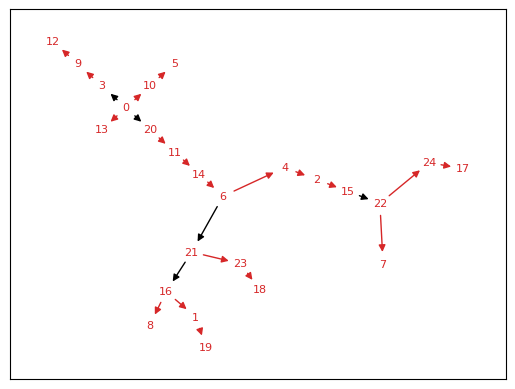

In [9]:
draw_tree(tree, layout)

In [10]:
nx.get_edge_attributes(tree, 'weight')

{(0, 10): 0.836421076969268,
 (0, 3): 0.013103367783688702,
 (0, 13): 0.7262272981922117,
 (0, 20): 0.5047640682204901,
 (1, 19): 0.170875725203801,
 (1, 16): 0.3080865576102688,
 (2, 4): 0.845082046846232,
 (2, 15): 0.4243311724950478,
 (3, 9): 0.8580423613054573,
 (4, 6): 0.9206158704075914,
 (5, 10): 0.02953092650613076,
 (6, 14): 0.8510336030494521,
 (6, 21): 0.7613031536987854,
 (7, 22): 0.2906467940973094,
 (8, 16): 0.7217751867117951,
 (9, 12): 0.05457439371107675,
 (11, 20): 0.1280819853686287,
 (11, 14): 0.9192106705964167,
 (15, 22): 0.056100215225575734,
 (16, 21): 0.0101666471483004,
 (17, 24): 0.979546224385978,
 (18, 23): 0.26628577521890684,
 (21, 23): 0.9220884782772878,
 (22, 24): 0.06332932175111716}

### Unit edge weights

In [11]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

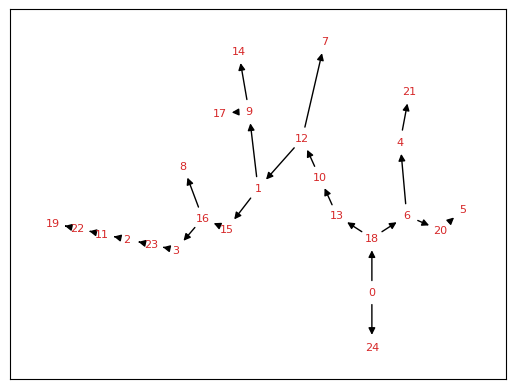

In [12]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (20, 0, 24, 18)
18: (18, 1, 13, 6)
24: (0, 1, None, None)
6: (4, 0, 4, 20)
13: (13, 1, 10, None)
20: (1, 1, 5, None)
4: (1, 1, 21, None)
10: (12, 1, 12, None)
5: (0, 1, None, None)
21: (0, 1, None, None)
12: (12, 0, 1, 7)
7: (0, 1, None, None)
1: (10, 1, 15, 9)
9: (2, 0, 17, 14)
15: (7, 1, 16, None)
14: (0, 1, None, None)
17: (0, 1, None, None)
16: (7, 0, 3, 8)
8: (0, 1, None, None)
3: (5, 1, 23, None)
23: (4, 1, 2, None)
2: (3, 1, 11, None)
11: (2, 1, 22, None)
22: (1, 1, 19, None)
19: (0, 1, None, None)
Path edges: [(0, 24), (0, 18), (18, 13), (6, 4), (6, 20), (13, 10), (20, 5), (4, 21), (12, 1), (12, 7), (1, 15), (9, 17), (9, 14), (16, 3), (16, 8), (3, 23), (23, 2), (2, 11), (11, 22), (22, 19)]
Total path length (x(root)): 20
Total path length (actual): 20
Difference: 0


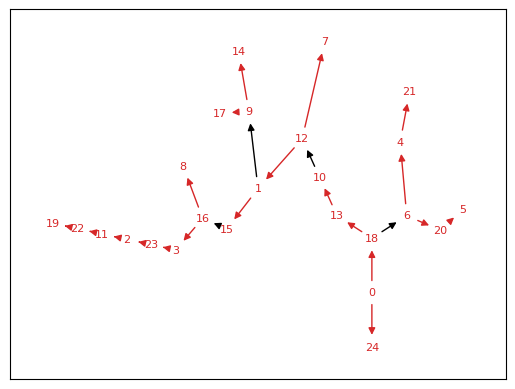

In [13]:
draw_tree(ones_tree, ones_layout)

In [14]:
util.path_cover_two(ones_tree)

{24: 0,
 5: 0,
 21: 0,
 7: 0,
 14: 0,
 17: 0,
 8: 0,
 19: 0,
 22: 1,
 11: 2,
 2: 3,
 23: 4,
 3: 5,
 16: 7,
 15: 7,
 9: 2,
 1: 10,
 12: 12,
 10: 12,
 4: 1,
 20: 1,
 13: 13,
 6: 4,
 18: 18,
 0: 20}